In [12]:
import pandas as pd

# 판다스 출력 결과를 소수점 둘째 자리 까지로 제한
pd.options.display.float_format = '{:,.2f}'.format

sales_df = pd.read_csv('sales_data.csv', index_col=['customer_id'])

sales_df

,total_buy_cnt,total_price
customer_id,,
12395,99,430250
12427,98,566410
12431,122,849900
12433,625,1180950
12471,10,97750
...,...,...
18144,30,90750
18168,243,1533530
18225,1,91430


## 이상치 제거

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

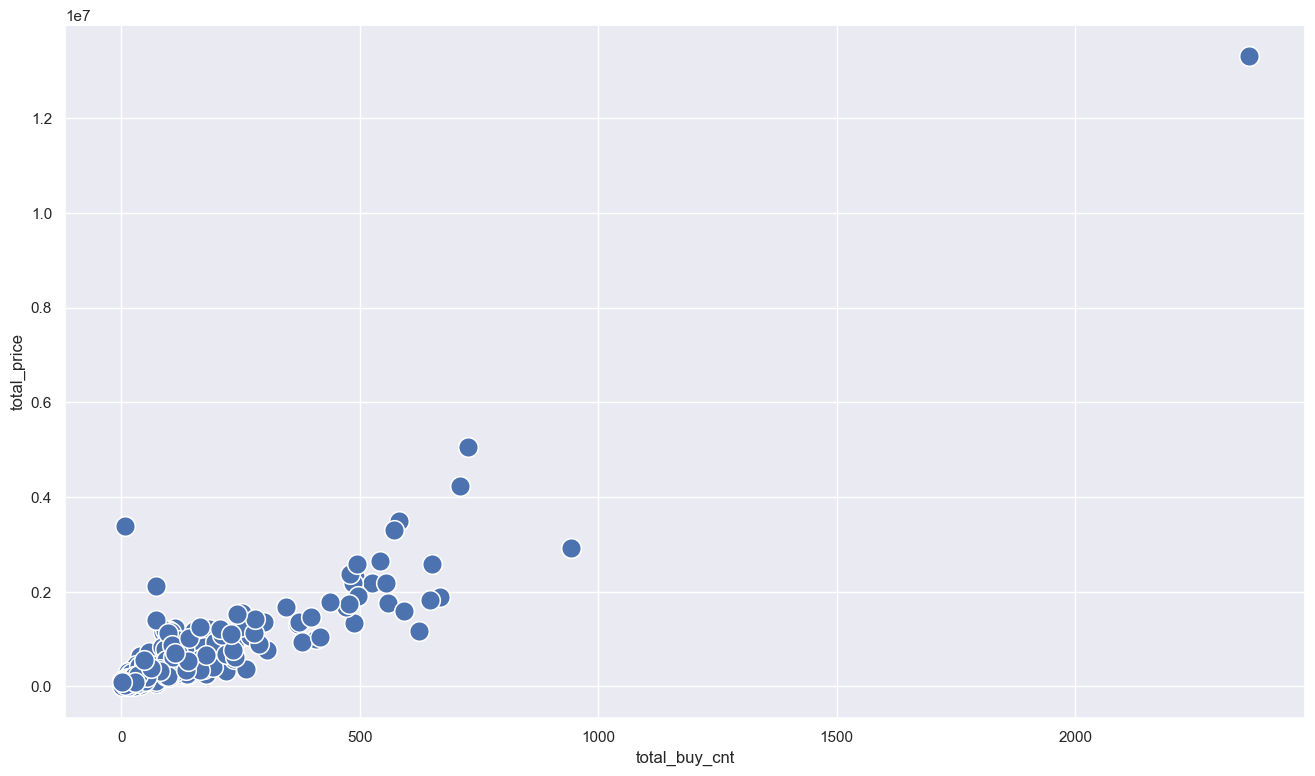

In [13]:
import seaborn as sns

sns.set(style='darkgrid',
       rc={'figure.figsize':(16,9)})

# 데이터 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

In [14]:
#  IQR방법 사용

def get_outlier_mask(df, weight=1.5):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    
    range_min = Q1 - IQR_weight
    range_max = Q3 + IQR_weight
    
    outlier_per_column = (df < range_min) | (df > range_max)
    
    is_outlier = outlier_per_column.any(axis=1)
    
    return is_outlier

<Axes: xlabel='total_buy_cnt', ylabel='total_price'>

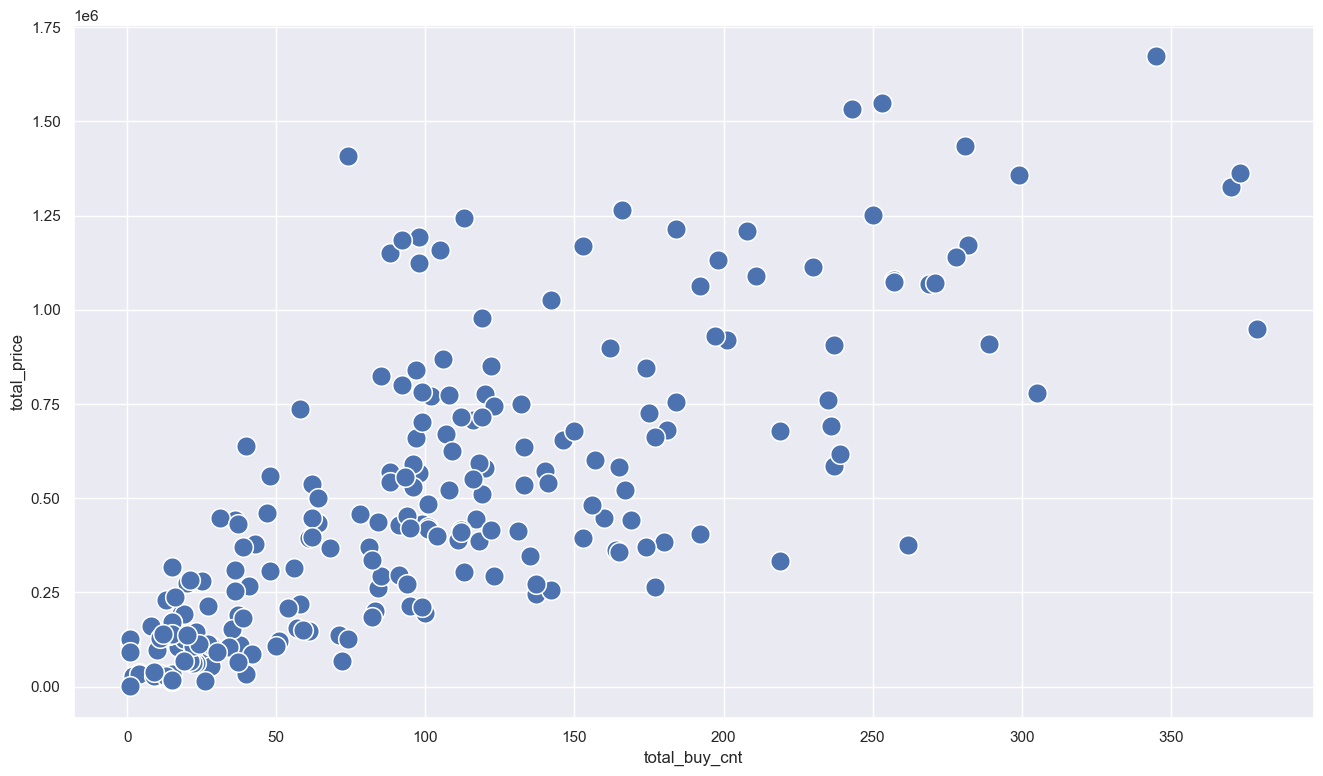

In [15]:
outlier_idx_cust_df = get_outlier_mask(sales_df, weight=1.5)

# 아웃라이어 제거한 데이터 프레임만 추가
sales_df = sales_df[~outlier_idx_cust_df]

# 아웃라이어 제거한 데이터프레임 시각화
sns.scatterplot(x=sales_df['total_buy_cnt'], y=sales_df['total_price'], s=200)

## 데이터 표준화(Standardization)
다음으론 변수의 단위를 살펴보겠습니다.

데이터를 보면 total_buy_cnt는 단위가 1개이고, 가장 큰 값은 350개입니다. 하지만, total_price는 기본 단위가 10,000원입니다. 두 변수의 단위가 많이 차이나네요.

이러면 total_price의 영향력이 너무 커져서 결과가 잘못될 가능성이 높습니다. 때문에, 표준화를 통해 변수 단위에 따른 상대적 영향을 제거해야 합니다.

표준화를 하면 평균이 0, 분산은 1로 값이 조정되어 단위가 통일되는 효과가 있습니다.

In [16]:
df_mean = sales_df.mean() # 각 컬럼의 평균값
df_std = sales_df.std() # 각 컬럼의 표준편차

scaled_df = (sales_df - df_mean)/df_std # 컬럼별 표준화 진행

scaled_df.columns = ['total_buy_cnt', 'total_price']

# 인덱스 설정
scaled_df.index = sales_df.index

scaled_df

,total_buy_cnt,total_price
customer_id,,
12395,-0.05,-0.15
12427,-0.07,0.21
12431,0.23,0.95
12471,-1.13,-1.02
12472,-0.19,0.21
...,...,...
18144,-0.89,-1.04
18168,1.69,2.74
18225,-1.24,-1.04
